# Rents & Fares Analysis by Census Tract

In [30]:
import pandas as pd
import numpy as np
import requests
import geopandas as gpd
from shapely.geometry import shape

## Summary Statistics

In [2]:
df = pd.read_csv('avg_rent_fare_by_dropofftract.csv', delimiter="|")
print("Summary Stats")
print(df.describe())
print()
corr_df = df.corr()
print("Correlation of Variables")
print(corr_df)
print()
df.hist(grid=False, sharey=True, alpha=0.5, figsize=(20, 10))
plt.tight_layout()
plt.savefig('histograms.png')
plt.clf()
print("Summary of Null Values by Col")
print(df.isnull().sum(axis=0))

Summary Stats
              stfid  med_rent_by_bdrm    avg_fare
count  9.250000e+02        918.000000  925.000000
mean   1.703146e+10       1088.388889   14.327864
std    2.935853e+05        358.728185    5.535096
min    1.703101e+10        282.000000    8.563462
25%    1.703119e+10        876.000000   11.421233
50%    1.703144e+10        998.000000   12.467957
75%    1.703180e+10       1209.750000   14.261064
max    1.703198e+10       3501.000000   44.583333

Correlation of Variables
                     stfid  med_rent_by_bdrm  avg_fare
stfid             1.000000         -0.124807  0.438401
med_rent_by_bdrm -0.124807          1.000000  0.216385
avg_fare          0.438401          0.216385  1.000000

Summary of Null Values by Col
geom                0
stfid               0
med_rent_by_bdrm    7
avg_fare            0
dtype: int64


<Figure size 1440x720 with 0 Axes>

In [29]:
df.head()

,geom,stfid,med_rent_by_bdrm,avg_fare
0,0103000020E6100000010000004F00000041F2CEA10CEB...,17031010100,865.0,12.989573
1,0103000020E61000000100000049000000CB9C2E8B89EB...,17031010201,989.0,12.295870
2,0103000020E6100000010000005300000072874D64E6EA...,17031010202,943.0,11.238104
3,0103000020E6100000010000007F000000AAF1D24D62EA...,17031010300,948.0,13.221144
4,0103000020E610000001000000A100000052B81E85EBE9...,17031010400,979.0,14.204847


## Find Median Fare & Rent Across All Observations

In [129]:
med_fare = df['avg_fare'].median()
med_rent = df['med_rent_by_bdrm'].median()
print(med_fare)
print(med_rent)

12.467956989247313
998.0


In [52]:
group1 = df[(df['avg_fare'] > med_fare) & (df['med_rent_by_bdrm'] > med_rent)]
group2 = df[(df['avg_fare'] < med_fare) & (df['med_rent_by_bdrm'] > med_rent)]
group3 = df[(df['avg_fare'] > med_fare) & (df['med_rent_by_bdrm'] < med_rent)]
group4 = df[(df['avg_fare'] < med_fare) & (df['med_rent_by_bdrm'] < med_rent)]

In [5]:
print('Amt Group 1')
print(group1.shape[0])
print('Amt Group 2')
print(group2.shape[0])
print('Amt Group 3')
print(group3.shape[0])
print('Amt Group 4')
print(group4.shape[0])

Amt Group 1
212
Amt Group 2
245
Amt Group 3
212
Amt Group 4
212


Write out each group to csv

In [53]:
group1.to_csv("highfarehighrent.csv", sep=",", float_format='%.2f',
                          index=False, line_terminator='\n')
group2.to_csv("lowfarehighrent.csv", sep=",", float_format='%.2f',
                          index=False, line_terminator='\n')
group3.to_csv("highfarelowrent.csv", sep=",", float_format='%.2f',
                          index=False, line_terminator='\n')
group4.to_csv("lowfarelowrent.csv", sep=",", float_format='%.2f',
                          index=False, line_terminator='\n')

In [39]:
r = requests.get('https://data.cityofchicago.org/resource/74p9-q2aq.json')
tract_data = r.json()
for d in tract_data:
    d['geometry'] = shape(d['the_geom'])
tracts_gdf = pd.DataFrame(tract_data).set_geometry('geometry')
tracts_gdf['stfid'] = tracts_gdf['geoid10']

In [41]:
tracts_gdf.head()

,commarea,commarea_n,countyfp10,geoid10,geometry,name10,namelsad10,notes,statefp10,the_geom,tractce10,stfid
0,44,44,031,17031842400,(POLYGON ((-87.62404799998049 41.7302169999839...,8424,Census Tract 8424,,17,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",842400,17031842400
1,59,59,031,17031840300,(POLYGON ((-87.6860799999848 41.82295600001154...,8403,Census Tract 8403,,17,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",840300,17031840300
2,34,34,031,17031841100,(POLYGON ((-87.62934700001182 41.8527970000265...,8411,Census Tract 8411,,17,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",841100,17031841100
3,31,31,031,17031841200,(POLYGON ((-87.68813499997718 41.8556909999909...,8412,Census Tract 8412,,17,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",841200,17031841200
4,32,32,031,17031839000,(POLYGON ((-87.63312200003458 41.8744880000269...,8390,Census Tract 8390,,17,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",839000,17031839000


In [44]:
tracts_gdf['stfid'] = pd.to_numeric(tracts_gdf['stfid'], errors='coerce')

Group 1: High Fare, High Rent (Cyan) <br>
Group 2: Low Fare, High Rent (Blue) <br>
Group 3: High Fare, Low Rent (Magenta) <br>
Group 4: Low Fare, Low Rent (Silver)

In [46]:
merged = pd.merge(df, tracts_gdf[['stfid', 'commarea', 'geometry']], on='stfid')
merged = gpd.GeoDataFrame(merged, geometry='geometry')

In [54]:
merged.loc[(merged['avg_fare'] > med_fare) & (merged['med_rent_by_bdrm'] > med_rent), 'group'] = 1
merged.loc[(merged['avg_fare'] < med_fare) & (merged['med_rent_by_bdrm'] > med_rent), 'group'] = 2
merged.loc[(merged['avg_fare'] > med_fare) & (merged['med_rent_by_bdrm'] < med_rent), 'group'] = 3
merged.loc[(merged['avg_fare'] < med_fare) & (merged['med_rent_by_bdrm'] < med_rent), 'group'] = 4
merged.head()

,geom,stfid,med_rent_by_bdrm,avg_fare,commarea,geometry,group
0,0103000020E6100000010000004F00000041F2CEA10CEB...,17031010100,865.0,12.989573,1,(POLYGON ((-87.66368000002299 42.0193980000148...,3.0
1,0103000020E61000000100000049000000CB9C2E8B89EB...,17031010201,989.0,12.295870,1,(POLYGON ((-87.6800950000417 42.01253799999502...,4.0
2,0103000020E6100000010000005300000072874D64E6EA...,17031010202,943.0,11.238104,1,(POLYGON ((-87.67335799998422 42.0193740000186...,4.0
3,0103000020E6100000010000007F000000AAF1D24D62EA...,17031010300,948.0,13.221144,1,(POLYGON ((-87.66505999995483 42.0128010000297...,3.0
4,0103000020E610000001000000A100000052B81E85EBE9...,17031010400,979.0,14.204847,1,(POLYGON ((-87.65080299995667 41.9984850000008...,3.0


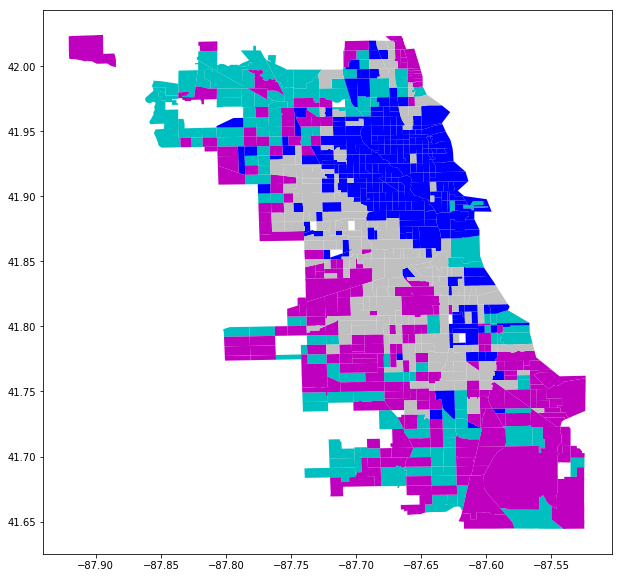

In [220]:
fig, ax = plt.subplots(figsize=(20,10))
merged[merged['group'] == 1].plot(color='c', ax=ax)
merged[merged['group'] == 2].plot(color='b', ax=ax)
merged[merged['group'] == 3].plot(color='m', ax=ax)
merged[merged['group'] == 4].plot(color='#C0C0C0', ax=ax)
plt.savefig('rent_vs_fares.png')

In [66]:
merged[merged['group'] == 1]

,geom,stfid,med_rent_by_bdrm,avg_fare,commarea,geometry,group
14,0103000020E6100000010000007E0000009EB0C403CAEC...,17031020302,1085.0,12.601962,2,(POLYGON ((-87.69018299996848 42.0095589999867...,1.0
18,0103000020E6100000010000004E000000807F4A9528EC...,17031020602,1133.0,13.102657,2,(POLYGON ((-87.69494699999383 42.0049469999634...,1.0
20,0103000020E61000000100000064000000D7C1C1DEC4EC...,17031020702,1143.0,12.571538,2,(POLYGON ((-87.70959900002015 41.9917500000106...,1.0
29,0103000020E610000001000000800000004205871744EA...,17031030200,1052.0,12.919656,77,(POLYGON ((-87.67062299996495 41.9980750000214...,1.0
32,0103000020E6100000010000007100000038F3AB3940EA...,17031030500,1375.0,12.914826,77,(POLYGON ((-87.66834900003155 41.9834950000317...,1.0
37,0103000020E6100000010000001700000079AC1919E4E9...,17031030702,1098.0,13.344120,77,(POLYGON ((-87.6551039999939 41.98065599997081...,1.0
39,0103000020E6100000010000007C00000039799109F8E9...,17031030706,1028.0,12.786616,77,(POLYGON ((-87.65047800001028 41.9841240000180...,1.0
40,0103000020E6100000010000006300000082FFAD64C7EA...,17031030800,1313.0,12.588746,77,(POLYGON ((-87.66875699997385 41.9834899999780...,1.0
53,0103000020E610000001000000A700000045F295404AEB...,17031040100,1160.0,12.626451,4,(POLYGON ((-87.67864999999873 41.9760459999807...,1.0
54,0103000020E6100000010000006D000000EF01BA2F67EC...,17031040201,1225.0,12.884600,4,(POLYGON ((-87.69876200001328 41.9707230000141...,1.0


# Rents w/ Fares by Mile

In [207]:
fare_by_mile = pd.read_csv('rent_fare_by_mile.csv', delimiter=",")
print("Summary Stats")
print(fare_by_mile.describe())
print()
corr_df = fare_by_mile.corr()
print("Correlation of Variables")
print(corr_df)
print()
fare_by_mile.hist(grid=False, sharey=True, alpha=0.5, figsize=(20, 10))
plt.tight_layout()
plt.savefig('histograms.png')
plt.clf()
print("Summary of Null Values by Col")
print(fare_by_mile.isnull().sum(axis=0))

Summary Stats
       dropoff_census_tract  avg_fare_by_mile  med_rent_by_bdrm
count          9.160000e+02        916.000000        909.000000
mean           1.703146e+10          3.369256       1089.364136
std            2.929840e+05          0.683562        360.105489
min            1.703101e+10          1.482617        282.000000
25%            1.703119e+10          3.006543        876.000000
50%            1.703144e+10          3.343054        998.000000
75%            1.703180e+10          3.718713       1211.000000
max            1.703198e+10          6.103535       3501.000000

Correlation of Variables
                      dropoff_census_tract  avg_fare_by_mile  med_rent_by_bdrm
dropoff_census_tract              1.000000         -0.473010         -0.122525
avg_fare_by_mile                 -0.473010          1.000000          0.240132
med_rent_by_bdrm                 -0.122525          0.240132          1.000000

Summary of Null Values by Col
dropoff_census_tract    0
geom       

<Figure size 1440x720 with 0 Axes>

In [212]:
fare_by_mile.head()

,dropoff_census_tract,geom,avg_fare_by_mile,med_rent_by_bdrm
0,17031010100,0103000020E6100000010000004F00000041F2CEA10CEB...,3.742459,865.0
1,17031010201,0103000020E61000000100000049000000CB9C2E8B89EB...,3.782953,989.0
2,17031010202,0103000020E6100000010000005300000072874D64E6EA...,4.270785,943.0
3,17031010300,0103000020E6100000010000007F000000AAF1D24D62EA...,3.537863,948.0
4,17031010400,0103000020E610000001000000A100000052B81E85EBE9...,3.350992,979.0


In [210]:
merged_w_mile = pd.merge(fare_by_mile, tracts_gdf[['stfid', 'commarea', 'geometry']], left_on='dropoff_census_tract', right_on='stfid')
merged_w_mile = gpd.GeoDataFrame(merged_w_mile, geometry='geometry')

In [213]:
med_fare_per_mile = merged_w_mile['avg_fare_by_mile'].median()
med_rent = merged_w_mile['med_rent_by_bdrm'].median()
print(med_fare_per_mile)
print(med_rent)

3.4211796693934184
989.0


In [217]:
merged_w_mile.loc[(merged_w_mile['avg_fare_by_mile'] > med_fare_per_mile) & (merged_w_mile['med_rent_by_bdrm'] > med_rent), 'group'] = 1
merged_w_mile.loc[(merged_w_mile['avg_fare_by_mile'] < med_fare_per_mile) & (merged_w_mile['med_rent_by_bdrm'] > med_rent), 'group'] = 2
merged_w_mile.loc[(merged_w_mile['avg_fare_by_mile'] > med_fare_per_mile) & (merged_w_mile['med_rent_by_bdrm'] < med_rent), 'group'] = 3
merged_w_mile.loc[(merged_w_mile['avg_fare_by_mile'] < med_fare_per_mile) & (merged_w_mile['med_rent_by_bdrm'] < med_rent), 'group'] = 4

Group 1: High Fare, High Rent (Cyan) <br>
Group 2: Low Fare, High Rent (Blue) <br>
Group 3: High Fare, Low Rent (Magenta) <br>
Group 4: Low Fare, Low Rent (Silver)

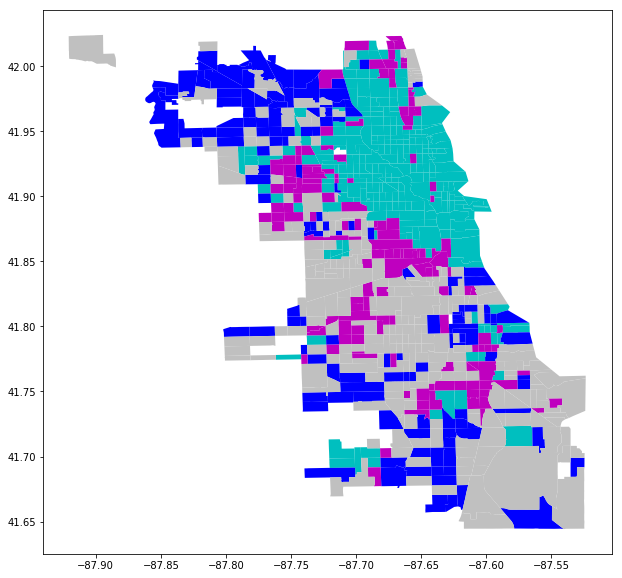

In [219]:
fig, ax = plt.subplots(figsize=(20,10))
merged_w_mile[merged_w_mile['group'] == 1].plot(color='c', ax=ax)
merged_w_mile[merged_w_mile['group'] == 2].plot(color='b', ax=ax)
merged_w_mile[merged_w_mile['group'] == 3].plot(color='m', ax=ax)
merged_w_mile[merged_w_mile['group'] == 4].plot(color='#C0C0C0', ax=ax)
plt.savefig('rent_vs_fares_per_mile.png')

# Comparing Tracts and Times

In [152]:
times_df = pd.read_csv('fare_tract_time_geom.csv', delimiter=",")
print("Summary Stats")
print(times_df.describe())
print()
corr_df = times_df.corr()
print("Correlation of Variables")
print(corr_df)
print()
times_df.hist(grid=False, sharey=True, alpha=0.5, figsize=(20, 10))
plt.tight_layout()
plt.savefig('histograms.png')
plt.clf()
print("Summary of Null Values by Col")
print(times_df.isnull().sum(axis=0))

Summary Stats
              stfid  dropoff_census_tract     avg_fare
count  4.153000e+03          4.153000e+03  4153.000000
mean   1.703143e+10          1.703143e+10    13.265907
std    2.873241e+05          2.873241e+05     3.920150
min    1.703101e+10          1.703101e+10     7.500000
25%    1.703117e+10          1.703117e+10    11.253662
50%    1.703139e+10          1.703139e+10    12.294783
75%    1.703170e+10          1.703170e+10    13.764884
max    1.703198e+10          1.703198e+10    50.123333

Correlation of Variables
                         stfid  dropoff_census_tract  avg_fare
stfid                 1.000000              1.000000  0.336633
dropoff_census_tract  1.000000              1.000000  0.336633
avg_fare              0.336633              0.336633  1.000000

Summary of Null Values by Col
stfid                   0
geom                    0
dropoff_census_tract    0
avg_fare                0
time_range              0
dtype: int64


<Figure size 1440x720 with 0 Axes>

Note the following:
- early_morning: Midnight to 6:59:59am
- morning_rush: 7am to 9:59:59am
- midday: 10am to 15:59:59 (3:59:59pm)
- evening_rush: 16 (4pm) to 18:59:59 (6:59:59pm)
- late_evening: 19 (7pm) to 23:59:59 (11:59:59pm)

In [153]:
times_df.head()

,stfid,geom,dropoff_census_tract,avg_fare,time_range
0,17031010100,0103000020E6100000010000004F00000041F2CEA10CEB...,17031010100,13.521986,early_morning
1,17031010100,0103000020E6100000010000004F00000041F2CEA10CEB...,17031010100,12.310812,evening_rush
2,17031010100,0103000020E6100000010000004F00000041F2CEA10CEB...,17031010100,13.113274,late_evening
3,17031010100,0103000020E6100000010000004F00000041F2CEA10CEB...,17031010100,13.624416,midday
4,17031010100,0103000020E6100000010000004F00000041F2CEA10CEB...,17031010100,11.174732,morning_rush


In [89]:
times_merged = pd.merge(times_df, tracts_gdf[['stfid', 'commarea', 'geometry']], on='stfid')
times_merged = gpd.GeoDataFrame(times_merged, geometry='geometry')

In [90]:
times_merged.head()

,stfid,geom,dropoff_census_tract,avg_fare,time_range,commarea,geometry
0,17031010100,0103000020E6100000010000004F00000041F2CEA10CEB...,17031010100,13.521986,early_morning,1,(POLYGON ((-87.66368000002299 42.0193980000148...
1,17031010100,0103000020E6100000010000004F00000041F2CEA10CEB...,17031010100,12.310812,evening_rush,1,(POLYGON ((-87.66368000002299 42.0193980000148...
2,17031010100,0103000020E6100000010000004F00000041F2CEA10CEB...,17031010100,13.113274,late_evening,1,(POLYGON ((-87.66368000002299 42.0193980000148...
3,17031010100,0103000020E6100000010000004F00000041F2CEA10CEB...,17031010100,13.624416,midday,1,(POLYGON ((-87.66368000002299 42.0193980000148...
4,17031010100,0103000020E6100000010000004F00000041F2CEA10CEB...,17031010100,11.174732,morning_rush,1,(POLYGON ((-87.66368000002299 42.0193980000148...


## Early Morning

In [168]:
early_morning = times_merged[times_merged['time_range'] == 'early_morning']
binned_fares = pd.qcut(early_morning['avg_fare'], 5, labels=[1, 2, 3, 4, 5], retbins=True)
print(binned_fares[1])
early_morning['binned_fares'] = binned_fares[0]

[ 9.38962754 10.96172552 12.08313739 13.24666359 14.4654462  36.624     ]


C:\Users\KKoenig\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Bins are as follows:
- 1: \\$9.38962754 (min val) to \\$10.96172552
- 2: \\$10.96172552 to \\$12.08313739
- 3: \\$12.08313739 to \\$13.24666359
- 4: \\$13.24666359  to \\$14.4654462
- 5: \\$14.4654462 to \\$36.624 (max val in avg_fare)

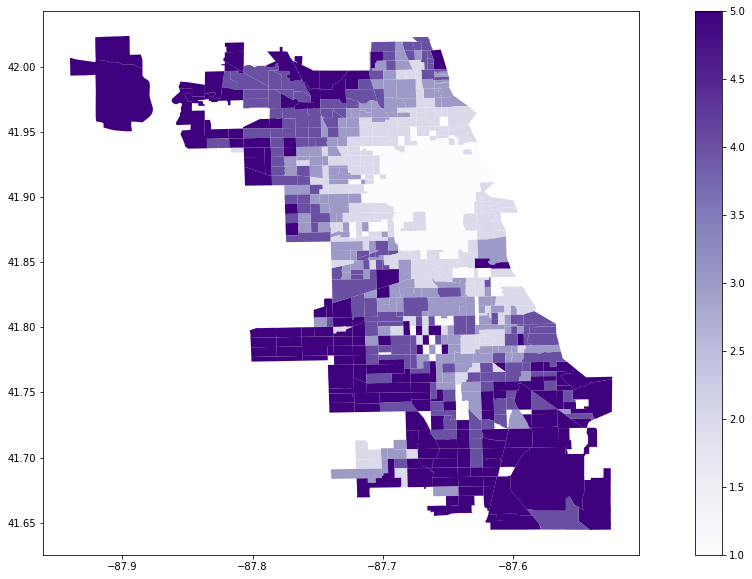

In [171]:
fig, ax = plt.subplots(figsize=(20,10))
early_morning.plot(column='binned_fares', cmap="Purples", ax=ax, legend=True)

## Morning Rush

In [182]:
morning_rush = times_merged[times_merged['time_range'] == 'morning_rush']
binned_fares = pd.qcut(morning_rush['avg_fare'], 5, labels=[1, 2, 3, 4, 5], retbins=True)
print(binned_fares[1])
morning_rush['binned_fares'] = binned_fares[0]

[ 7.5        10.52007112 11.32647452 12.21884058 13.34992366 35.48568667]


C:\Users\KKoenig\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Bins are as follows:
- 1: \\$7.5 (min val) to \\$10.52007112
- 2: \\$10.52007112 to \\$11.32647452
- 3: \\$11.32647452 to \\$12.21884058
- 4: \\$12.21884058 to \\$13.34992366
- 5: \\$13.34992366 to \\$35.48568667 (max val in avg_fare)

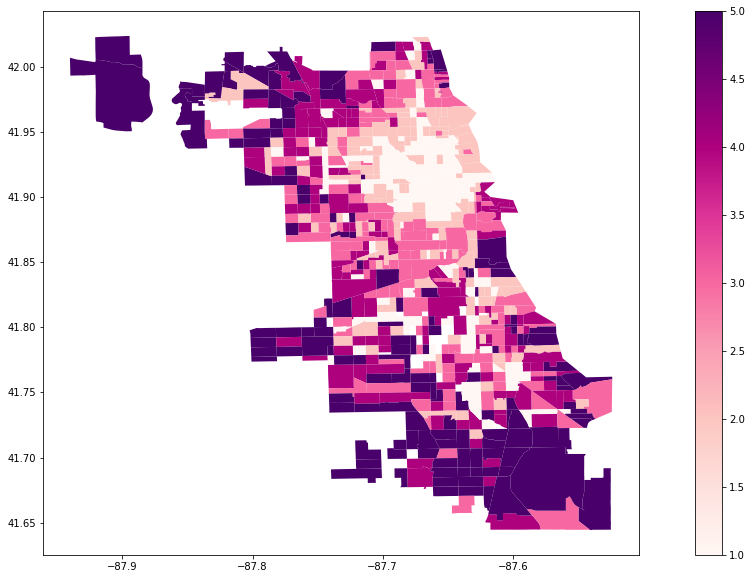

In [183]:
fig, ax = plt.subplots(figsize=(20,10))
morning_rush.plot(column='binned_fares', cmap="RdPu", ax=ax, legend=True)

## Midday

In [191]:
midday = times_merged[times_merged['time_range'] == 'midday']
binned_fares = pd.qcut(midday['avg_fare'], 5, labels=[1, 2, 3, 4, 5], retbins=True)
print(binned_fares[1])
midday['binned_fares'] = binned_fares[0]

[ 9.04101227 11.09732921 11.78680141 12.51550555 13.63040203 37.10143062]


C:\Users\KKoenig\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Bins are as follows:
- 1: \\$9.04101227 (min val) to \\$11.09732921
- 2: \\$11.09732921 to \\$11.78680141
- 3: \\$11.78680141 to \\$12.51550555
- 4: \\$12.51550555 to \\$13.63040203
- 5: \\$13.63040203 to \\$37.10143062 (max val in avg_fare)

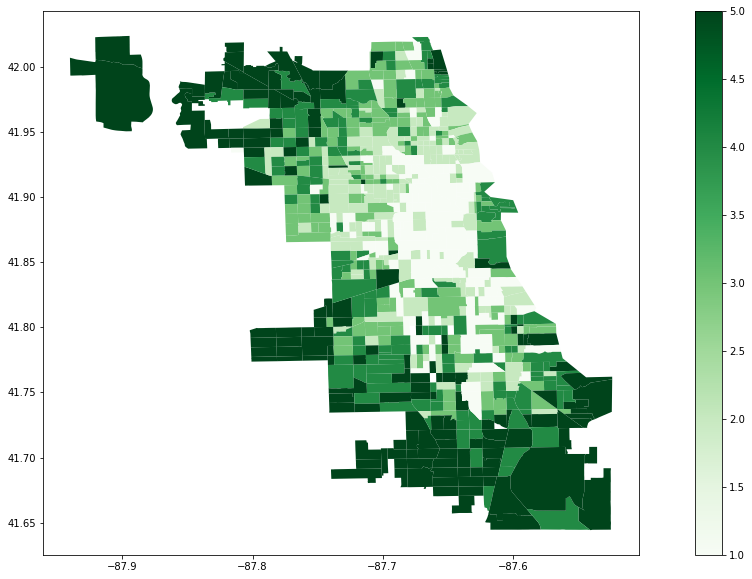

In [192]:
fig, ax = plt.subplots(figsize=(20,10))
midday.plot(column='binned_fares', cmap="Greens", ax=ax, legend=True)

## Evening Rush

In [202]:
evening_rush = times_merged[times_merged['time_range'] == 'evening_rush']
binned_fares = pd.qcut(evening_rush['avg_fare'], 5, labels=[1, 2, 3, 4, 5], retbins=True)
print(binned_fares[1])
evening_rush['binned_fares'] = binned_fares[0]

[ 8.94857143 11.2525797  11.88191667 12.50561665 13.59521667 37.35649321]


C:\Users\KKoenig\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Bins are as follows:
- 1: \\$8.94857143 (min val) to \\$11.2525797
- 2: \\$11.2525797 to \\$11.88191667
- 3: \\$11.88191667 to \\$12.50561665
- 4: \\$12.50561665 to \\$13.59521667
- 5: \\$13.59521667 to \\$37.35649321 (max val in avg_fare)

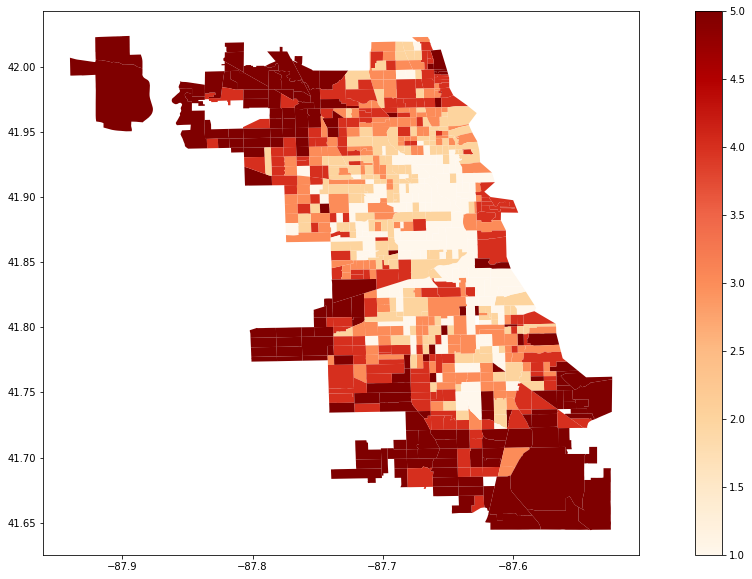

In [204]:
fig, ax = plt.subplots(figsize=(20,10))
evening_rush.plot(column='binned_fares', cmap="OrRd", ax=ax, legend=True)

## Late Evening

In [161]:
late_evening = times_merged[times_merged['time_range'] == 'late_evening']
binned_fares = pd.qcut(late_evening['avg_fare'], 5, labels=[1, 2, 3, 4, 5], retbins=True)
print(binned_fares[1])
late_evening['binned_fares'] = binned_fares[0]

[ 9.40228963 11.16251311 11.84038633 12.6590005  13.79630173 38.33518082]


C:\Users\KKoenig\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Bins are as follows:
- 1: \\$9.40228963 (min val) to \\$11.1625131
- 2: \\$11.1625131 to  \\$11.84038633
- 3: \\$11.84038633 to \\$12.6590005
- 4: \\$12.6590005 to \\$13.79630173
- 5: \\$13.79630173 to \\$38.33518082 (max val in avg_fare)

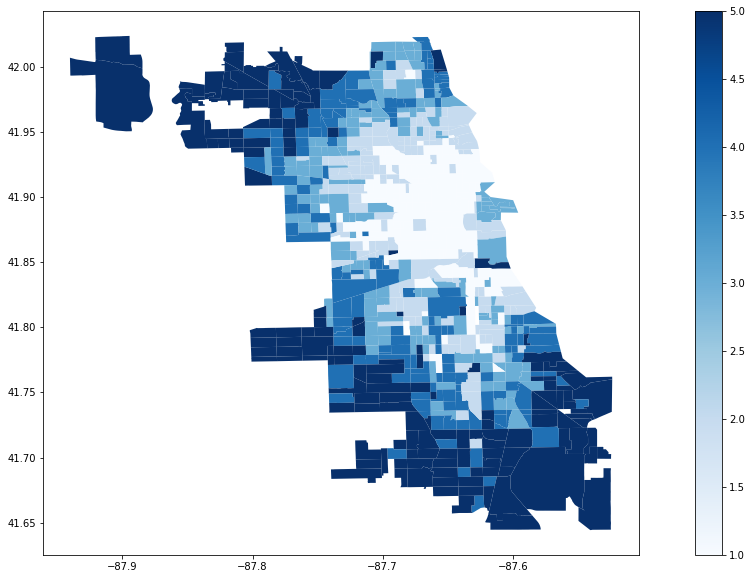

In [167]:
fig, ax = plt.subplots(figsize=(20,10))
late_evening.plot(column='binned_fares', cmap="Blues", ax=ax, legend=True)